In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import librosa
import seaborn as sns
import pandas as pd
import src

In [9]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
nNotes = 2000
root = 60

# Evaluator object
evaluator = src.evaluation.MelodyEvaluator(root)

### Sanity check that functions work

In [45]:
testPath = "./data/strawmantest/example.mid"
outPath = "./data/test.mid"
midi = src.pretty_midi.PrettyMIDI(testPath)
matRoll = src.midi.midi_to_matrix_quantized(testPath)
# src.midi.matrix_to_midi(matRoll,outPath)
evaluator.evaluate_melody(matRoll)

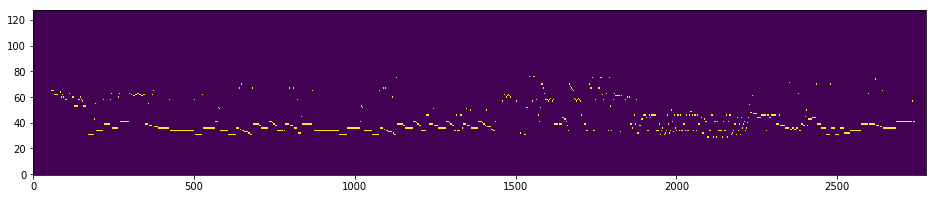

In [47]:
## Plotting what a single piano roll looks like
plt.figure(figsize=(16,5))
plt.imshow(matRoll.T,aspect=4,origin='lower')
plt.show()

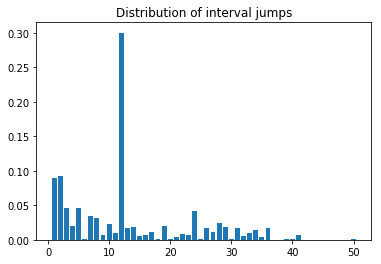

In [49]:
# checking output of evaluator - interval jump distribution
intervalDict = evaluator.eval_stats['raw_intervals']
plt.bar(intervalDict.keys(),intervalDict.values())
plt.title("Distribution of interval jumps")
plt.show()

## Evaluating Pink Noise Baseline

In [10]:
# Evaluate pink noise 
pinkNoiseGen = src.pink_noise.PinkNoise(nNotes) 
baseline_melody = pinkNoiseGen.generate_melody()

In [11]:
evaluator.evaluate_melody(baseline_melody)
interval_stats = evaluator.eval_stats['interval_stats']

In [12]:
data = [go.Bar(x=[key for key in interval_stats.keys()], y=[val for val in interval_stats.values()])]
iplot(go.Figure(data=data), filename='test.png')

In [13]:
pinkNoiseGen.output_midi(baseline_melody,'../data/pink.mid')

## Evaluate baseline Markov Process

### Classical piece files

In [14]:
# Evaluate baseline Markov process
monteCarloGen = src.monte_carlo.MonteCarlo("../data/RedditMIDI/Classical_mfiles.co.uk_MIDIRip/")
monteCarloGen.train()

/Users/Akash/Stanford/Fall2017/CS221/project/cs221-iMGM/src/pretty_midi/pretty_midi.py:100: RuntimeWarning:

Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.



In [16]:
markov_melody = monteCarloGen.generate_melody(note1=root,num_notes=nNotes)

In [17]:
evaluator.evaluate_melody(markov_melody)
interval_stats = evaluator.eval_stats['interval_stats']
data = [go.Bar(x=[key for key in interval_stats.keys()], y=[val for val in interval_stats.values()])]
iplot(go.Figure(data=data), filename='test.png')

### Jazz dataset

In [7]:
# Evaluate baseline Markov process
monteCarloGen = src.monte_carlo.MonteCarlo("../data/RedditMIDI/Jazz_www.thejazzpage.de_MIDIRip/")
monteCarloGen.train()

/Users/Akash/Stanford/Fall2017/CS221/project/cs221-iMGM/src/pretty_midi/pretty_midi.py:100: RuntimeWarning:

Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.



Error processing file, MIDI output path: ../data/RedditMIDI/Jazz_www.thejazzpage.de_MIDIRip/OpFunk.mid
Error processing file, MIDI output path: ../data/RedditMIDI/Jazz_www.thejazzpage.de_MIDIRip/poinciana.mid


In [8]:
markov_melody = monteCarloGen.generate_melody(note1=root,num_notes=nNotes)

In [9]:
evaluator.evaluate_melody(markov_melody)
interval_stats = evaluator.eval_stats['interval_stats']
data = [go.Bar(x=[key for key in interval_stats.keys()], y=[val for val in interval_stats.values()])]
iplot(go.Figure(data=data), filename='test.png')

In [14]:
# Evaluate source (training) MIDI files directly 
monteCarloGen.output_midi(markov_melody,'../data/outJazz.mid')